# Ridge Regression with Holdout: Gas Mileage Prediction

In [7]:
import numpy as np
import pandas as pd
# import piplite
# await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statistics import stdev, mean

# Reference: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

from ucimlrepo import fetch_ucirepo 
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
# data (as pandas dataframes) 
features = energy_efficiency.data.features 
targets = energy_efficiency.data.targets 
# metadata 
print(energy_efficiency.metadata) 
# variable information 
print(energy_efficiency.variables) 

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

In [8]:
# Extract the regressors and the target from the data frame
x, y = features.iloc[:,:].to_numpy(), targets.iloc[:,0].to_numpy()
print(x)

# Hold out the validation and test data
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    test_R2 = mdl.score(X_test,y_test)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    print(f"\tTesting accuracy (R2): {test_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

x_transpose = x.transpose()
std_list = []
mean_list = []
for i in range(x_transpose.shape[0]):
    std_list.append(stdev(x_transpose[i]))
    mean_list.append(mean(x_transpose[i]))
    


[[9.800e-01 5.145e+02 2.940e+02 ... 2.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 3.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 4.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 4.000e-01 5.000e+00]]
(460, 8)
(154, 8)
(154, 8)
Alpha: 0.0
	Coefficients: [-5.93624728e+00  1.67814822e+13 -8.42704387e+12 -1.72159018e+13
  7.50743313e+00  1.21089104e-02  2.52457030e+00  2.88031103e-01]
	Intercept: 22.331013554351628
	Training accuracy (R2): 0.9241033376006489
	Validation accuracy (R2): 0.9090689033179231
	Testing accuracy (R2): 0.8953112964802009
Alpha: 0.001
	Coefficients: [-5.93451702 -3.18578276  0.82778904 -3.51058993  7.53186822 -0.09785126
  2.52230988  0.27823879]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.9241944125357854
	Validation accuracy (R2): 0.9089146794641

Best alpha: 0.0
Coefficients: [-5.93624728e+00  1.67814822e+13 -8.42704387e+12 -1.72159018e+13
  7.50743313e+00  1.21089104e-02  2.52457030e+00  2.88031103e-01]
Intercept: 22.331013554351628
Normalized coefficients: [np.float64(-63.344430254422136), np.float64(190512227681.4568), np.float64(-193163500508.11124), np.float64(-381169922912.1438), np.float64(1.2891216947465463), np.float64(-3.1176329365624706), np.float64(17.19100452361389), np.float64(-1.6276818508946242)]
Last 5 values are most important: [6 0 1 2 3]
	Training accuracy (R2): 0.9241033376006489
	Validation accuracy (R2): 0.9090689033179231
	Testing accuracy (R2): 0.8953112964802009


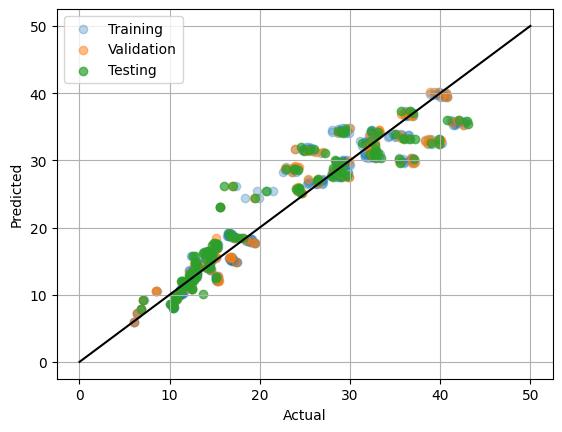

In [9]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

normalized_coefficients = []
for i in range(len(best_mdl[1].coef_)):
    # print(best_mdl[1].coef_[i], mean_list[i], std_list[i])
    normalized_coefficients.append((best_mdl[1].coef_[i] - mean_list[i]) / std_list[i])
print(f"Normalized coefficients: {normalized_coefficients}")
order = abs(np.array(normalized_coefficients)).argsort()
print(f"Last 5 values are most important: {order[-5:]}")

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
train_R2 = best_mdl.score(X_train,y_train)
val_R2 = best_mdl.score(X_val,y_val)
print(f"\tTraining accuracy (R2): {train_R2}")
print(f"\tValidation accuracy (R2): {val_R2}")
print(f"\tTesting accuracy (R2): {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

a. [30 pts] Split the samples into 60% Training, 20% Validation, and 20% Testing data at random.
Build a pipeline with Standard scaler then linear ridge regression. Set your own 10 different
choices of regularization, find the best choice that gives the highest accuracy on the validation
data, then make one final evaluation on the test data. What is the best model’s coefficients,
intercept, and its training, validation, and test accuracy?

Given the array

    [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

as the 10 choices of regularization, the model with alpha = 0.0 yielded the best validation accuracy.


The best model's coefficients were

    [-5.93624728e+00  1.67814822e+13 -8.42704387e+12 -1.72159018e+13 7.50743313e+00  1.21089104e-02  2.52457030e+00  2.88031103e-01]

with an intercept of

    22.331013554351628.


The training, validation, and test accuracy were as follows.

	Training accuracy (R2): 0.9241033376006489
	Validation accuracy (R2): 0.9090689033179231
	Testing accuracy (R2): 0.8953112964802009

[30 pts] Based on your answer in item (a), what are the top 5 features among X1 to X8? If you
repeat the procedure above using only the 5 top features, what are the results?

By obtaining the normalized coefficients:

    [np.float64(-63.344430254422136), np.float64(190512227681.4568), np.float64(-193163500508.11124), np.float64(-381169922912.1438), np.float64(1.2891216947465463), np.float64(-3.1176329365624706), np.float64(17.19100452361389), np.float64(-1.6276818508946242)]

we were able to obtain the coefficients with the highest magnitudes as containing the top 5 features among X1 to X8 as

    [X7 X1 X2 X3 X4]


In [10]:
# Extract the regressors and the target from the data frame
x, y = features.iloc[:,[0,1,2,3,6]].to_numpy(), targets.iloc[:, 0].to_numpy()

# Hold out the validation and test data
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.1, 0.5, 1, 5, 10, 50, 100]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    test_R2 = mdl.score(X_test,y_test)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    print(f"\tTesting accuracy (R2): {test_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

(460, 5)
(154, 5)
(154, 5)
Alpha: 0.0
	Coefficients: [-1.42557035e+01  2.90164189e+13 -1.45709796e+13 -2.97675623e+13
  2.61547389e+00]
	Intercept: 22.342498421959455
	Training accuracy (R2): 0.9056129631406773
	Validation accuracy (R2): 0.8837096679776189
	Testing accuracy (R2): 0.8880365365473304
Alpha: 0.1
	Coefficients: [-13.80038768 -10.92458673   0.57633192 -10.93102962   2.61174795]
	Intercept: 22.31526086956518
	Training accuracy (R2): 0.9055744877885296
	Validation accuracy (R2): 0.8832351027432778
	Testing accuracy (R2): 0.8877608764732755
Alpha: 0.5
	Coefficients: [-12.5364812  -10.20845177   0.86187002 -10.37273391   2.60885734]
	Intercept: 22.315260869565183
	Training accuracy (R2): 0.905203013520619
	Validation accuracy (R2): 0.8815734861453789
	Testing accuracy (R2): 0.8863575086770142
Alpha: 1.0
	Coefficients: [-11.21601513  -9.46016268   1.15955969  -9.78904354   2.60541518]
	Intercept: 22.315260869565186
	Training accuracy (R2): 0.9043045398721163
	Validation accuracy

Best alpha: 0.0
Coefficients: [-1.42557035e+01  2.90164189e+13 -1.45709796e+13 -2.97675623e+13
  2.61547389e+00]
Intercept: 22.342498421959455
	Training accuracy (R2): 0.9056129631406773
	Validation accuracy (R2): 0.8837096679776189
	Testing accuracy (R2): 0.8880365365473304


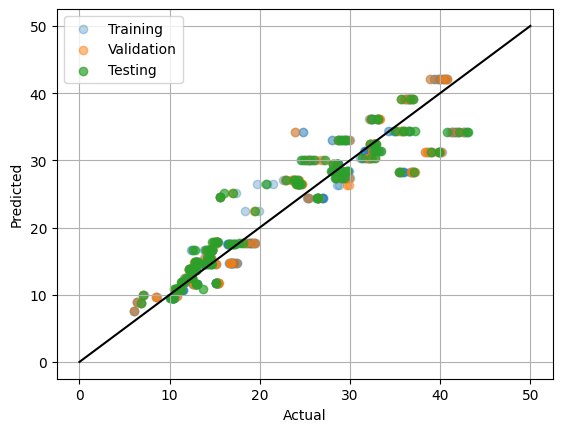

In [11]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
train_R2 = best_mdl.score(X_train,y_train)
val_R2 = best_mdl.score(X_val,y_val)
test_R2 = best_mdl.score(X_test,y_test)
print(f"\tTraining accuracy (R2): {train_R2}")
print(f"\tValidation accuracy (R2): {val_R2}")
print(f"\tTesting accuracy (R2): {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

The results of using the top 5 features are as follows:

    Best alpha: 0.0

    Coefficients: [-1.42557035e+01  2.90164189e+13 -1.45709796e+13 -2.97675623e+13 2.61547389e+00]
  
    Intercept: 22.342498421959455

	  Training accuracy (R2): 0.9056129631406773
	  Validation accuracy (R2): 0.8837096679776189
	  Testing accuracy (R2): 0.8880365365473304